## Weather data Austin (2010)

In [32]:
df_weather = pd.read_csv('weather_data_austin_2010.csv', parse_dates = True, index_col ="Date")
df_weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [33]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


#### Plot the Temperature & Dew Point of the first 500 entries
- On the same axes

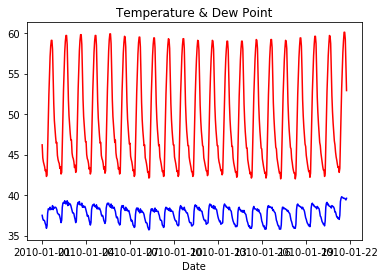

In [34]:
import matplotlib.pyplot as plt

plt.plot(df_weather.index[0:500], df_weather.Temperature[0:500], 'red')
plt.plot(df_weather.index[0:500], df_weather.DewPoint[0:500], 'blue') 
plt.xlabel('Date')
plt.title('Temperature & Dew Point')
plt.show() # Renders plot objects to screen

- Different axises

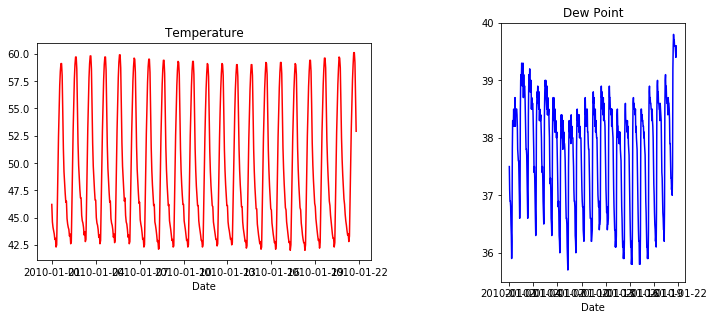

In [35]:

plt.plot(df_weather.index[0:500], df_weather.Temperature[0:500], 'red')
plt.xlabel('Date')
plt.title('Temperature')

plt.axes([1.2,0.05,0.425,0.9])
plt.plot(df_weather.index[0:500], df_weather.DewPoint[0:500], 'blue')
plt.xlabel('Date')
plt.title('Dew Point')
plt.show()

- Using subplot

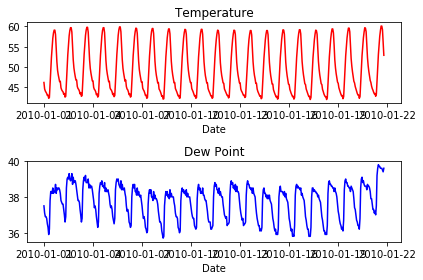

In [36]:
# (number of subplots, the number of column, the number of row)
plt.subplot(2, 1, 1) 
plt.plot(df_weather.index[0:500], df_weather.Temperature[0:500], 'red')
plt.xlabel('Date')
plt.title('Temperature')

plt.subplot(2, 1, 2)
plt.plot(df_weather.index[0:500], df_weather.DewPoint[0:500], 'blue')
plt.xlabel('Date')
plt.title('Dew Point')
plt.tight_layout()
plt.show()

## Austin Climate Normals (2011)
Source: National Oceanic & Atmospheric Administration, www.noaa.gov/climate

In [37]:
import pandas as pd

# Read in the data file: df
df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.txt')

# Print the output of df.head()
df.head()


,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


#### Reading data without headers

In [38]:
# Read in the data file with header=None: df_headers
df_headers = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.txt', header=None)

# Print the output of df_headers.head()
df_headers.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


#### Re-assigning column names and dropping unnecessary columns

In [39]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']


# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df_headers.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df_headers.drop(list_to_drop, axis='columns')

In [40]:
# Print the output of df_dropped.head()
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


#### Clean up the date and Time columns and combine them into a datetime collection to be used as the Index

In [41]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped.date + df_dropped.Time

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)


In [42]:
# Print the output of df_clean.head()
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


#### Cleaning numeric columns

In [43]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


#### Statistical Data Analysis

In [44]:
# Print the median of the dry_bulb_faren column
print("The median of the dry_bulb_faren:", df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print("The median of the dry_bulb_faren between 2011-Apr and 2011-Jun:", df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print("The median of the dry_bulb_faren in January:", df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

The median of the dry_bulb_faren: 72.0
The median of the dry_bulb_faren between 2011-Apr and 2011-Jun: 78.0
The median of the dry_bulb_faren in January: 48.0


In [45]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_weather.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056482


#### Compare temperatures on sunny days against temperatures on overcast days

In [46]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean.loc[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,10.00,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,10.00,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,10.00,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,10.00,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


In [52]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('w').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())


                dry_bulb_faren
dry_bulb_faren             1.0


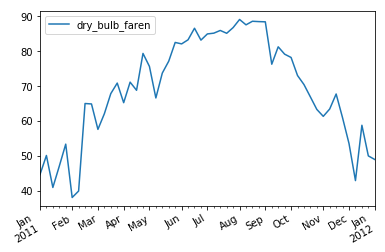

In [53]:
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

In [48]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
resampled

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

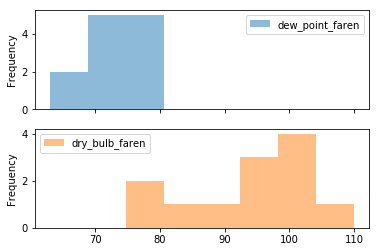

In [49]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren', 'dry_bulb_faren']].resample('m').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

95.3


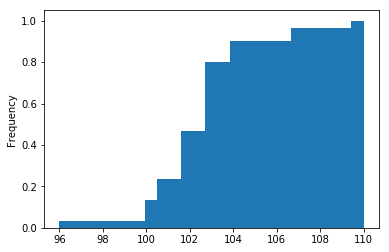

In [50]:
# Extract the maximum temperature in August 2010 from df_weather: august_max
august_max = df_weather.loc['2010-08', 'Temperature'].max()
print(august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean.loc['2011-Aug', 'dry_bulb_faren'].resample('D').max()


# Filter for days in august_2011 where the value exceeds august_max: august_2011_high
august_2011_high = august_2011[august_2011> august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', bins =25, normed = True, cumulative= True )

# Display the plot
plt.show()